# Regression analysis
Regression models are used to predict target variables on a continuous scale, which makes them attractive for addressing many questions in science as well as applications in industry, such as understanding relationships between variables, evaluating trends, or making forecasts. One example would be predicting the sales of a company in future months.


Regression analysis is a set of statistical methods used for the estimation of relationships between a dependent variable and one or more independent variables. It can be utilized to assess the strength of the relationship between variables and for modeling the future relationship between them.

Regression analysis is an important tool for modelling and analyzing data. Here, we fit a curve / line to the data points, in such a manner that the differences between the distances of data points from the curve or line is minimized.

#### Benefits of using regression analysis:
* It indicates the significant relationships between dependent variable and independent variable.
* It indicates the strength of impact of multiple independent variables on a dependent variable.

Regression analysis also allows us to compare the effects of variables measured on different scales, such as the effect of price changes and the number of promotional activities. These benefits help market researchers / data analysts / data scientists to eliminate and evaluate the best set of variables to be used for building predictive models.


One of the primary goals of any scientist is to find patterns in data and build models to describe, predict, and extract insight from those patterns. The most fundamental of these patterns is a linear relationship between two variables. 


# Simple linear regression
Simple linear regression is a model that assesses the relationship between a dependent variable and one independent variable. The simple linear model is expressed using the following equation:

Y = a + bX + ϵ


Where:

Y – dependent variable

X – independent (explanatory) variable

a – intercept

b – slope

ϵ – residual (error)

Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. 

It looks for statistical relationship but not deterministic relationship. Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other. 

For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.

The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible.



# Multiple linear regression
Multiple linear regression analysis is essentially similar to the simple linear model, with the exception that multiple independent variables are used in the model. The mathematical representation of multiple linear regression is:

Y = a + b$X_{1}$ + c$X_{2}$ + d$X_{3}$ + ϵ

Where:

Y – dependent variable

$X_{1}$, $X_{2}$, $X_{3}$ – independent (explanatory) variables

a – intercept

b, c, d – slopes

ϵ – residual (error)

# Real-time example : 
We have a dataset which contains information about customers' quarterly balance, their demographic and Wallet transaction. 

Goal is to design a model that can predict Wallet transaction if given the customers' information. This will help the bank to identify the customers with high Customer LifeTime Value(CLTV) which in turn will help the bank to engage these customers to build long lasting relations.

A linear regression line can be obtained from the given data which will give minimum error. This linear equation is then used for any new data. That is, if we give information of any customer as an input, our model should predict their Wallet transaction with minimum error.

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [2]:
# read data into a DataFrame
import pandas as pd
import numpy as np

data = pd.read_csv('Data/Linr_Reg_data_v02.csv')
print(data.head())

  Cust_id  Qtr1_Bal  Qtr2_Bal  Qtr3_Bal  Qtr4_Bal  Perc_inc_q4_q1  Wallet_trx  \
0  C10803        47        36       NaN     50000            26.7       22334   
1  C10020        34        10       NaN     40000             0.8       24699   
2   C6176        11         9       NaN     30000             5.3       57263   
3   C8563        10        15       NaN      9000             3.7       18888   
4  C10031        41        42      23.0      4000             1.8        2042   

    Age  Gender   Area  
0  57.0  Female   East  
1  52.0  Female  South  
2  51.0  Female  North  
3  48.0    Male   West  
4  53.0  Female   East  


We can see that the data contains different columns like Customer ID, Quarterly balances, Percentage increase from Q1 to Q4, Demographics of Customer, etc.

Do you Customer ID has any relevance in model building ?
Answer is big NO. Since Customer IDs is a unique identifier in the data, it can be removed from the data for our analysis and model buiding process. 

But can we do something else with Customer ID ?
Answer is big YES. We can use it as our index column which will not have any impact in model building and will be there in the dataset as well.

Let's see how we can do that.

In [3]:
# read data into a DataFrame
data = pd.read_csv('Data/Linr_Reg_data_v02.csv', index_col=0)
print(data.head())

         Qtr1_Bal  Qtr2_Bal  Qtr3_Bal  Qtr4_Bal  Perc_inc_q4_q1  Wallet_trx  \
Cust_id                                                                       
C10803         47        36       NaN     50000            26.7       22334   
C10020         34        10       NaN     40000             0.8       24699   
C6176          11         9       NaN     30000             5.3       57263   
C8563          10        15       NaN      9000             3.7       18888   
C10031         41        42      23.0      4000             1.8        2042   

          Age  Gender   Area  
Cust_id                       
C10803   57.0  Female   East  
C10020   52.0  Female  South  
C6176    51.0  Female  North  
C8563    48.0    Male   West  
C10031   53.0  Female   East  


In the above read_csv function call, we added an argument "index_col" and initialize it with value 0.

"index_col" is used to define if any column needs to be taken as index. Initializing it with 0 means Column 0, i.e., the first column(Cust_ID) should be considered as index column of the dataframe.

In [4]:
print(data.shape)

(10100, 9)


There are 10100 customers information in the data with 9 variables. Out of these 9, 1 is target variable and rest 8 are predictor variables.

What are the **features**?
- Qtrx_Bal: Quarterly Balance (in thousands of Rupees)
- Perc_inc_q4_q1: Percentage increase in Quarter 4 from Quarter 1
- Age: Age of the customer
- Gender: Gender of the customer
- Area: Area of the customer

What is the **response**?
- Wallet_trx: Wallet transaction (in thousands of Rupees)

## Questions About the Customers Data

Let's say you work for the company that creates digital wallet for their customers. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between quarterly balance and Wallet transaction?
2. How strong is that relationship?
3. Which gender types contribute to more wallet transaction?
4. What is the effect of each quarter balance to Wallet transaction?
5. Given all these variables, can Wallet transaction be predicted?

We will explore these questions below!

# Data Cleaning
Before moving forward, we need to make sure that the data is cleaned. 

Cleaning data is just something you’re going to have to deal with in analytics. It’s not great work, but it has to be done so you can produce great work.

# Check Missing Value 
Lets quickly check which column has how many missing values ?

In [5]:
print(data.isnull().sum())

Qtr1_Bal             0
Qtr2_Bal             0
Qtr3_Bal             6
Qtr4_Bal             0
Perc_inc_q4_q1       0
Wallet_trx           0
Age               1781
Gender               0
Area                26
dtype: int64


We can see there are missing values in Qtr3_Bal, Age and Area.


There are multiple ways to treat the missing values. Some of them are : 

* Remove rows with missing values
* Remove columns with missing values
* Replace the missing values with a unique constant value or mean(or mode in case of categorical), etc

There are few ML algorithms which support missing values which we will discuss later.

In [6]:
print(data.shape)

(10100, 9)


Out of 10100, 26 rows have Area missing. 

Let's replace the missing values of Area by mode value of Area since Area is a categorical variable.

In [7]:
# Find the mean value of Age
print(data.Area.mode())

0    West
dtype: object


In [8]:
# Replace the missing values in Area by mode value of Area
data.loc[data['Area'].isnull(),'Area'] = 'West'

In [9]:
print(data['Area'].mode())

0    West
dtype: object


Mode remains same as we have replaced missing values with mode only.

In [10]:
print(data['Area'].isnull().sum())

0


Now, no missing value in Area.

Let's do the missing value treatment for Qtr3_Bal variable. Since the number of missing values(6 out of 10100) in Qtr3_Bal is too small, we can replace missing values with its mean.

In [11]:
# Find the mean value of Qtr3_Bal
print(data.Qtr3_Bal.mean())

22.451654448187043


In [12]:
# Replace the missing values in Area by mode value of Qtr3_Bal
data.loc[data['Qtr3_Bal'].isnull(),'Qtr3_Bal'] = 22.452

In [13]:
print(data['Qtr3_Bal'].mean())

22.451654653465347


Mean remains same as we have replaced missing values with mean only.

In [14]:
print(data['Qtr3_Bal'].isnull().sum())

0


Now, no missing value in Qtr3_Bal.

Let's do the missing value treatment for Age variable.

In [15]:
print(1781/10100)

0.17633663366336633


Almost 18% missing values. Since we have a lot of missing values here, we can drop this column.

In [16]:
data = data.drop('Age',axis=1)
print(data.shape)
print(data.isnull().sum())

(10100, 8)
Qtr1_Bal          0
Qtr2_Bal          0
Qtr3_Bal          0
Qtr4_Bal          0
Perc_inc_q4_q1    0
Wallet_trx        0
Gender            0
Area              0
dtype: int64


# Outlier Treatment
In statistics, an outlier is an observation point that is distant from other observations.

1. Find the Outliers - 
    * Boxplot
    * Percentiles
2. Remove the Outliers
    * Replace with 75th percentile value
    * Replace with 90th percentile value
    * Replace with 95th percentile value

For visualization, we will make use of another python library named as **MATPLOTLIB**.

# Matplotlib
To make necessary statistical inferences, it becomes necessary to visualize your data and **Matplotlib** is one such solution for the Python users. 

It is a very powerful plotting library useful for those working with Python and NumPy. The most used module of Matplotib is Pyplot which provides an interface like MATLAB but instead, it uses Python and it is open source.

In [17]:
import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

### Lets see above code line by line
1. Step 1 : Import matplotlib's pyplot module with the alias **plt**.

2. Step 2 : To show each plot within the jupyter notebook, we need to use this line of code (%matplotlib inline)

# Boxplot
In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

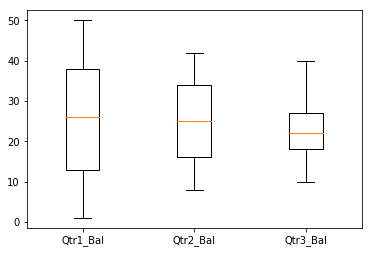

In [18]:
box_data = np.array(data[['Qtr1_Bal','Qtr2_Bal','Qtr3_Bal']])
plt.boxplot(box_data,labels=['Qtr1_Bal','Qtr2_Bal','Qtr3_Bal'])
plt.show()

There seems to be no outliers in these variables. Lets inspect other variables too.

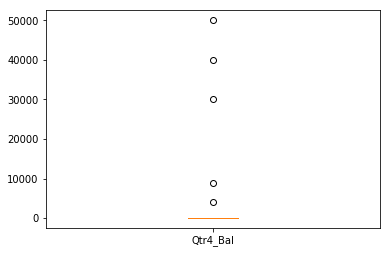

In [19]:
box_data = np.array(data[['Qtr4_Bal']])
plt.boxplot(box_data,labels=['Qtr4_Bal'])
plt.show()

Qtr4_Bal seems to have outliers. We will inspect more with the help of percentiles.

In [20]:
np.percentile(data['Qtr4_Bal'],[50,60,70,80,90,95,99,100])

array([   75.,    79.,    83.,    87.,    91.,    93.,    95., 50000.])

Checking the percentiles, we can see that 99th percentile value is just 95, but maximum value is 50000. 

Thus for this, we can remove the outliers using 99th percentile.

Let's first check how many outliers are there.

In [21]:
print(data.loc[data.Qtr4_Bal>95,'Qtr4_Bal'])

Cust_id
C10803    50000
C10020    40000
C6176     30000
C8563      9000
C10031     4000
Name: Qtr4_Bal, dtype: int64


We can see there are 5 values in Qtr4_Bal which are very high. 

We can either remove these rows or replace these values with the mean value.

In [22]:
# Remove these rows
print("Shape of the Data before removing outliers : ",data.shape)
data = data[data['Qtr4_Bal']<=95]
print("Shape of the Data after removing outliers : ",data.shape)

Shape of the Data before removing outliers :  (10100, 8)
Shape of the Data after removing outliers :  (10095, 8)


We have removed those rows here.

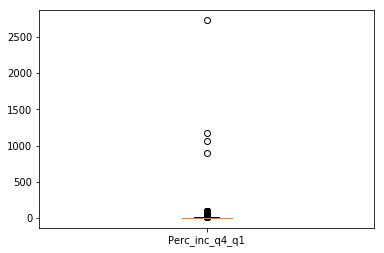

In [23]:
box_data = np.array(data[['Perc_inc_q4_q1']])
plt.boxplot(box_data,labels=['Perc_inc_q4_q1'])
plt.show()

Perc_inc_q4_q1 seems to have outliers. We will inspect more with the help of percentiles.

In [24]:
# Use the below code to suppress numbers to print in exponential form
np.set_printoptions(suppress=True)

In [25]:
np.percentile(data['Perc_inc_q4_q1'],[50,60,70,80,90,95,99,100])

array([   1.9,    2.7,    3.8,    6.1,   12.3,   22.8,   72. , 2726.3])

Checking the percentiles, we can see that 99th percentile value is just 72, but maximum value is 2726.3. 

Thus for this, we can remove the outliers using 99th percentile.

Let's first check how many outliers are there.

In [26]:
print(data.loc[data.Perc_inc_q4_q1>72,'Perc_inc_q4_q1'])

Cust_id
C6937    1062.8
C6987    1175.5
C7336    2726.3
C7383     899.0
C8502      96.6
          ...  
C7006      83.0
C9057      77.0
C9177      84.0
C5912      91.0
C7480      89.0
Name: Perc_inc_q4_q1, Length: 94, dtype: float64


We can see there are 94 values in Perc_inc_q4_q1 which are greater than 99th percentile value but all do not seem to be Outliers.

Outliers seem to be the rows where value is greater than 97.

We can either remove these rows or replace these values with the mean value.

In [27]:
# Remove these rows
print("Shape of the Data before removing outliers : ",data.shape)
data = data[data['Perc_inc_q4_q1']<97]
print("Shape of the Data after removing outliers : ",data.shape)

Shape of the Data before removing outliers :  (10095, 8)
Shape of the Data after removing outliers :  (10091, 8)


We have removed those rows here.

In [28]:
data.describe()

,Qtr1_Bal,Qtr2_Bal,Qtr3_Bal,Qtr4_Bal,Perc_inc_q4_q1,Wallet_trx
count,10091.000000,10091.000000,10091.000000,10091.000000,10091.000000,10091.000000
mean,25.531662,25.164107,22.450986,74.872560,5.565345,128.045189
std,14.334897,10.150152,6.484181,11.798205,11.417046,237.477642
min,1.000000,8.000000,10.000000,55.000000,0.100000,15.000000
25%,13.000000,16.000000,18.000000,65.000000,1.000000,33.000000
50%,26.000000,25.000000,22.000000,75.000000,1.900000,53.000000
75%,38.000000,34.000000,27.000000,85.000000,4.700000,108.000000
max,50.000000,42.000000,40.000000,95.000000,96.600000,1980.000000


In [29]:
print(data.head())

         Qtr1_Bal  Qtr2_Bal  Qtr3_Bal  Qtr4_Bal  Perc_inc_q4_q1  Wallet_trx  \
Cust_id                                                                       
C10201          2        31      39.0        73             4.1         753   
C11061          3        16      17.0        69             9.0         470   
C1231           9        15      18.0        88             8.8         193   
C1513          14        31      28.0        57             3.1          76   
C1627          22        38      23.0        91             3.1          79   

         Gender   Area  
Cust_id                 
C10201   Female  North  
C11061   Female   West  
C1231      Male   West  
C1513    Female   West  
C1627    Female   West  


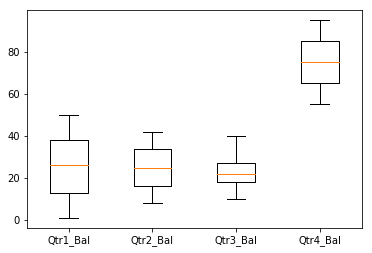

In [30]:
box_data = np.array(data[['Qtr1_Bal','Qtr2_Bal','Qtr3_Bal','Qtr4_Bal']])
plt.boxplot(box_data,labels=['Qtr1_Bal','Qtr2_Bal','Qtr3_Bal','Qtr4_Bal'])
plt.show()

Now no more outliers are there.

## Good Read : 
*Boxplot* : https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51 

# Categorical Variables treatment
Scikit-learn needs all variables to be numeric. Hence categorical/string variables need to be converted into numeric.
This can be done using pandas' get_dummies() function.

In [31]:
print(pd.get_dummies(data['Gender']))

         Female  Male
Cust_id              
C10201        1     0
C11061        1     0
C1231         0     1
C1513         1     0
C1627         1     0
...         ...   ...
C9766         0     1
C9852         0     1
C9884         1     0
C9930         0     1
C9957         0     1

[10091 rows x 2 columns]


As we can see the Gender variable is now converted into two variables : Male and Female

Append this data into original data and remove Gender from it.

In [32]:
data = pd.concat([data,pd.get_dummies(data.Gender)],axis=1)
data = data.drop('Gender',axis=1)

In above code, axis=1 tells that computation needs to be done on column for each row.

1. In the first line where concatenation is done, concatenation is needed to be done for each row.

2. In the second line where a variable needs to be dropped, 'Gender' column is needed to be done for each row.

#### Axis
It specifies the axis along which the computations are to be done. 

By default axis=0, which means along the rows, and axis=1 means along the columns. 

What makes more sense to say it this way:
* Axis 0 will act on all the ROWS in each COLUMN
* Axis 1 will act on all the COLUMNS in each ROW

So a mean on axis 0 will be the mean of all the rows in each column, and a mean on axis 1 will be a mean of all the columns in each row.

<img src = "Images/axis.jpg">

In [33]:
print(data.head())

         Qtr1_Bal  Qtr2_Bal  Qtr3_Bal  Qtr4_Bal  Perc_inc_q4_q1  Wallet_trx  \
Cust_id                                                                       
C10201          2        31      39.0        73             4.1         753   
C11061          3        16      17.0        69             9.0         470   
C1231           9        15      18.0        88             8.8         193   
C1513          14        31      28.0        57             3.1          76   
C1627          22        38      23.0        91             3.1          79   

          Area  Female  Male  
Cust_id                       
C10201   North       1     0  
C11061    West       1     0  
C1231     West       0     1  
C1513     West       1     0  
C1627     West       1     0  


In [34]:
print(data.shape)

(10091, 9)


Repeat the same process for Area variable also.

In [35]:
data = pd.concat([data,pd.get_dummies(data.Area)],axis=1)
data = data.drop('Area',axis=1)

In [36]:
print(data.shape)

(10091, 12)


In [37]:
print(data.head())

         Qtr1_Bal  Qtr2_Bal  Qtr3_Bal  Qtr4_Bal  Perc_inc_q4_q1  Wallet_trx  \
Cust_id                                                                       
C10201          2        31      39.0        73             4.1         753   
C11061          3        16      17.0        69             9.0         470   
C1231           9        15      18.0        88             8.8         193   
C1513          14        31      28.0        57             3.1          76   
C1627          22        38      23.0        91             3.1          79   

         Female  Male  East  North  South  West  
Cust_id                                          
C10201        1     0     0      1      0     0  
C11061        1     0     0      0      0     1  
C1231         0     1     0      0      0     1  
C1513         1     0     0      0      0     1  
C1627         1     0     0      0      0     1  


# Correlation
It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. This knowledge can help you better prepare your data to meet the expectations of machine learning algorithms whose performance will degrade with the presence of these interdependencies.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

### Correlation matrix 
Correlation matrix is a matrix in which i-j position defines the correlation between the ith and jth parameter of the given dataset.

Correlation matrix can be found by using corr() on any pandas dataframe. 

Lets calculate the correlation matrix.

In [38]:
feature_data = data[['Qtr1_Bal','Qtr2_Bal','Qtr3_Bal','Qtr4_Bal','Perc_inc_q4_q1']]
corr_matrix = feature_data.corr()
print(corr_matrix)

                Qtr1_Bal  Qtr2_Bal  Qtr3_Bal  Qtr4_Bal  Perc_inc_q4_q1
Qtr1_Bal        1.000000  0.001456 -0.003548 -0.009190       -0.564647
Qtr2_Bal        0.001456  1.000000  0.000491 -0.010554       -0.007553
Qtr3_Bal       -0.003548  0.000491  1.000000  0.003883       -0.005122
Qtr4_Bal       -0.009190 -0.010554  0.003883  1.000000        0.095494
Perc_inc_q4_q1 -0.564647 -0.007553 -0.005122  0.095494        1.000000


### Visualizing Correlation Matrix
The correlation matrix shown above is very boring to study. What if we could visualize it using some plot.

Heatmaps are there to rescue.

# Heatmap
A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. 

Lets see how we can plot a heatmap for our correlation matrix.

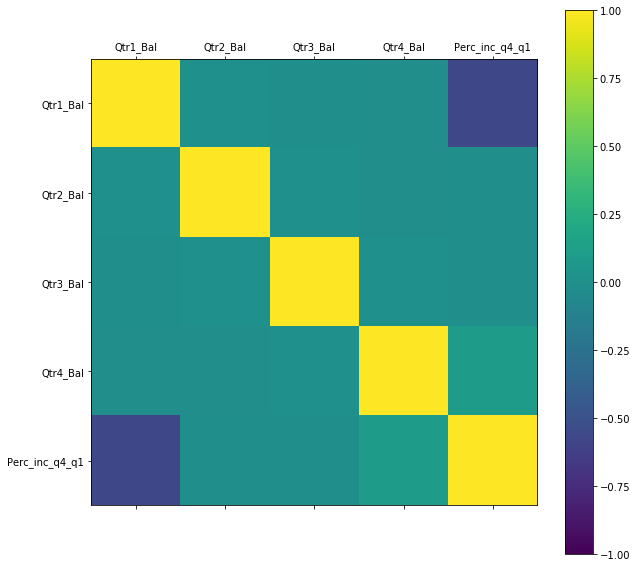

In [39]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
plt.show()

## Lets see the code line by line.

Step 1 : Initialize a figure variable with a figure object with figsize = 10,10. This is done so that figure related attributes can be changed by using **figure**.

Step 2 : Similarly, initialize an ax variable by adding a subplot to the figure variable. This is done so that axis related attributes can be changed by using **ax**.

Step 3 : Now, create a plot. For this we are using matshow(). This will plot the values of a 2D matrix as color-coded image. The matrix will be shown the way it would be printed, with the first row at the top. Row and column numbering is zero-based.

Step 4 : Next line of code is used to add a colorbar to the plot; which we can see in the  right side(a vertical bar).

Step 5 : Now, we need to set the number of ticks, i.e., number of axis label values in the plot.

Step 6 : We are setting number of x-axis ticks.

Step 7 : We are setting number of y-axis ticks.

Step 8 : We are setting values of x-axis ticks as column names of correlation matrix.

Step 9 : We are setting values of y-axis ticks as column names of correlation matrix.

Step 10 : SHOW THE PLOT.

We can see that Qtr1_Bal and Perc_inc_q4_q1 are negatively correlated. But this correlation value is only -0.56.

# Linearity between Predictors and Target variables
Let's plot the predictor variables with respect to target variable and see the relation between them.

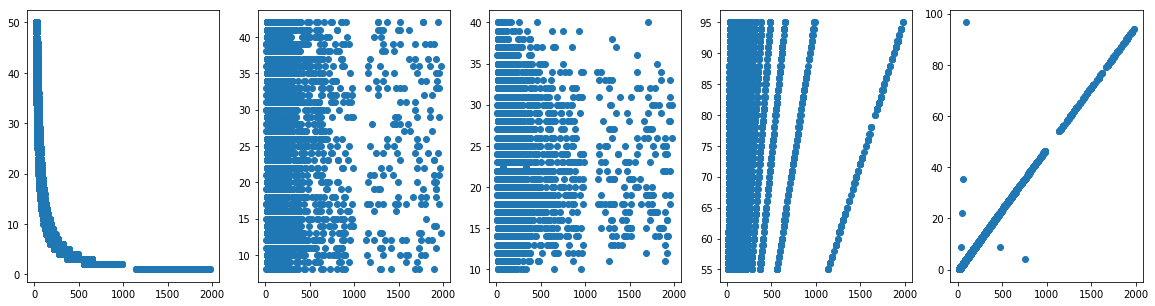

In [40]:
fig = plt.figure(figsize=(20,5))
axes = fig.subplots(ncols=5)
for i, xvar in enumerate(['Qtr1_Bal', 'Qtr2_Bal', 'Qtr3_Bal','Qtr4_Bal','Perc_inc_q4_q1']):
    axes[i].scatter(data['Wallet_trx'],data[xvar])
plt.show()

### Lets see the code line by line

Step 1 : Initialize a fig variable with a figure object with figsize = 20,5. This is done so that figure related attributes can be changed by using figure.

Step 2 : Similarly, initialize an axes variable by adding a subplot to the figure variable. This is done so that axes related attributes can be changed by using axes. Here we want to plot 4 subplots in same plot. Hence, we use ncols value equal to 4.

Step 3 : Now, we run a for loop to plot each predictor variable with target variable. So, we iterate over the list of predictor variables using enumerate function.

Step 4 : Now, we keep plotting a scatter plot for each iteration between Wallet_trx and predictor variable.

Step 5 : SHOW THE PLOTS

Here, Qtr1_Bal seems to have non-linear relationship with Wallet_transaction.

Also, Qtr4_Bal and Perc_inc_q4_q1 have a linear relationship with Wallet_transaction.

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are to find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="Images/08_estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="Images/08_slope_intercept.png">

### The mathematics behind the Least Squares Method.

Take a quick look at the plot we created. Now consider each point, and know that they each have a coordinate in the form (X,Y). Now draw an imaginary line between each point and our current "best-fit" line. We'll call the distanace between each point and our current best-fit line, D. To get a quick image of what we're currently trying to visualize, take a look at the picture below:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png">

Now as before, we're labeling each green line as having a distance D, and each red point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the property were:
$$ D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$

So how do we find this line? The least-square line approximating the set of points:

$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$

has the equation:
$$ Y = a_{0} +a_{1}X $$
this is basically just a rewritten form of the standard equation for a line:
$$Y=mx+b$$

We can solve for these constants a0 and a1 by simultaneously solving these equations:
$$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$
$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$

These are called the normal equations for the least squares line. There are further steps that can be taken in rearranging these equations  to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here.

# Scikit-Learn
Scikit-learn is an open source Python library that implements a range of machine learning, pre-processing, cross-validation and visualization algorithms using a unified interface. 

Scikit-learn provides algorithms for machine learning tasks including classification, regression, dimensionality reduction, and clustering. It also provides modules for extracting features, processing data, and evaluating models.


Let's create a simple linear regression model using scikit-learn. 
Do not forget to import LinearRegression from scikit-learn.

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
# create X and y
feature_cols = ['Qtr4_Bal']
X = data[feature_cols]
y = data.Wallet_trx

# follow the usual sklearn pattern: import, instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_[0])

-16.67406889110731
1.9328744501344919


Lets see above code line by line.

Step 1 : We define a variable "featue_cols" and initialize it to a list with name of a dataset variable "Qtr4_Bal".
We have done this to make our code more robust so that next time we just add more column names to this list and run the code without changing anything else.

Step 2 : We define X with data containins only these feature_cols defined in Step 1.

Step 3 : We define y with target values from the data.

Step 4 : This is an object instantiater of LinearRegression type with the name **lm**. You will see this type of syntax a lot in building models using scikit learn library.

Step 5 : After instantiating LinearRegression, we will feed the data to lm object to train the model on this data.

Step 6 : Once the model is built, we will check what are the values of intercept and coefficients using lm object.

#### Evaluation of Model
How can we evaluate if our trained model is a good model ?
Answer : We can check its accuracy.

Checking the accuracy on the same data on which you have trained is not a good way to judge the model.
Answer : We can use more data to check the accuracy on it.

What if you dont have more data ?
Answer : We could split the data into two parts : Train and Test. Then we use the train data to build the model and test the accuracy on test data.

# Train and Test

When you’re working on a model and want to train it, you obviously have a dataset. 

But after training, we have to test the model on some test dataset. For this, you’ll a dataset which is different from the training set you used earlier. 

But it might not always be possible to have so much data during the development phase.


In such cases, the obviously solution is to split the dataset you have into two sets, one for training and the other for testing; and you do this before you start training your model.

But the question is, how do you split the data? 

You can’t possibly manually split the dataset into two. And you also have to make sure you split the data in a random manner. 

To help us with this task, the SciKit library provides a tool, called the **Model Selection** library. There’s a class in the library which is named **train_test_split**. 

Using this we can easily split the dataset into the training and the testing datasets in various proportions.

Lets see how we can achieve this.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# create X and y
feature_cols = ['Qtr4_Bal']
X = data[feature_cols]
y = data.Wallet_trx

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=123)

# follow the usual sklearn pattern: import, instantiate, fit
lm = LinearRegression()
lm.fit(X_train, y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_[0])

-1.8748733094083718
1.7360292497202088


In above code, we have split the data X and y into two parts 
* train data : X_train and y_train
* test data : X_test and y_test


The splitting is done using train_test_split function which takes following arguments :
* X : dataset containing predictor variables
* y : dataset containing target variables
* test_size : ratio of data to be present in test dataset
* random_state : seed for the random number generator during the split. If you don’t pass anything, the RandomState instance used by np.random will be used instead. And every time, we run this code, it will take a random number and provide different rows into train and test.

Check the size of train and test data.

In [45]:
print(X_train.shape)
print(X_test.shape)

(7568, 1)
(2523, 1)


Since we have used test_size = 0.25, we are getting 25% rows into test data and 75% data into train data.

#### Write a code to split the data into train and test with train having 80% of the data and random state as 25.

## Interpreting Model Coefficients

How do we interpret the Qtr4_Bal coefficient ($\beta_1$)?
- A "unit" increase in Qtr4_Bal is **associated with** a Rs 1.74 increase in Wallet_trx.
- Or more clearly: An additional Rs 1,000 in Qtr4_Bal is **associated with** a increase in Wallet_trx of Rs 1736.

Note that if an increase in Qtr4_Bal spending was associated with a **decrease** in Wallet_trx, $\beta_1$ would be **negative**.

## Evaluating the model 
Evaluate the model accuracy by checking the RMSE value on train and test data.

<img src = "Images/rmse-1.jpg">

We will use predict() to predict the output given the input values. 

Below is the code to predict the output and calculate the rmse.

In [46]:
y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(np.mean(np.square(y_train-y_train_pred)))
print(train_rmse)

235.30219457534724


Thus we can see train rmse is 235.30.

Lets check the RMSE for test data.

In [47]:
y_test_pred = lm.predict(X_test)
test_rmse = np.sqrt(np.mean(np.square(y_test-y_test_pred)))
print(test_rmse)

239.58342841481132


Test RMSE is 239.58 which is very near to Train RMSE. Thus model is not overfitting.

Do we have to write a code to calculate rmse or any other metric every time we need to evaluate the model ?

You can use the scikit learn library's **metrics** module to ease your coding.

# sklearn metrics
As you train your predictive model, you will want to assess how good it is. Interestingly, there are many different ways of evaluating the performance. 

Scikit-learn contains many built-in functions for analyzing the performance of models. You can write your own functions from scratch or you can use sklearn's metrics module to do the same.

Below are few of the metrics provided by sklearn metrics used in evaluating a regression model:
* Mean Absolute Error
* Mean Squared Error
* R^2

Before start calculating different metrics, do not forget to import the functions

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
train_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Train RMSE : ",train_rmse)
print("Test RMSE : ",test_rmse)

Train RMSE :  235.3021945753468
Test RMSE :  239.58342841481127


We can see rmse values using library function is exactly same by calculating from scratch.

We will use other metric functions later in the session.

Now, What after building the model ? How will you use this model for the new data ?

Lets see below.

## Using the Model for Prediction

Let's say that there was a new customer where the Qtr4_Bal was **10**. What would we predict for the Wallet_trx for that customer?

$$y = \beta_0 + \beta_1x$$
$$y = -1.87487330941 + 1.73602924972 \times 10$$

In [50]:
# manually calculate the prediction
-1.87487330941 + 1.73602924972*10

15.485419187789999

Thus, we would predict Wallet_trn of **Rs 15.49** for that customer.

In [51]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'Qtr4_Bal': [10]})
X_new.head()

,Qtr4_Bal
0,10


Here, we are creating a dataset using pandas DataFrame function which is taking a dictionary.

Keys of the dictionary will be the names of the columns and Values will be the values of the columns.

In [52]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([15.48541919])

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [53]:
# create a DataFrame with the minimum and maximum values of Qtr1_Bal
X_new = pd.DataFrame({'Qtr4_Bal': [data.Qtr4_Bal.min(), data.Qtr4_Bal.max()]})
X_new.head()

,Qtr4_Bal
0,55
1,95


Now, we are creating a dataset by taking minimum value of Qtr4_Bal and maximum value of Qtr4_Bal to check what will be the values of Wallet Transaction based on min and max values of Qtr4_Bal.

In [54]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
print(preds)

[ 93.60673543 163.04790541]


Lets plot the dataset and the linear regression model to visualize.

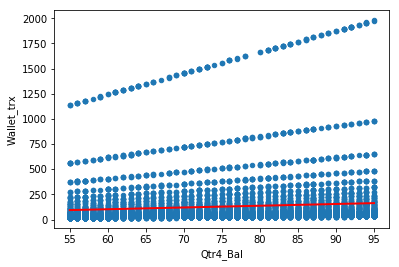

In [55]:
# first, plot the observed data
data.plot(kind='scatter', x='Qtr4_Bal', y='Wallet_trx')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

#### Lets see the above code line by line :
Step 1 : Use the dataset which you need to plot. Provide the type of the plot('scatter'), x-variable and y-variable.

Step 2 : Use the plt's plot function to plot a line with first variable as x-variable and second variable as y-variable, with Red color by using 'c' argument and linewidth equal to 2.


## Confidence in our Model

**Question:** Is linear regression a high bias/low variance model, or a low bias/high variance model?

**Answer:** High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

If running below code gives you some error, high chances are it is because you did not have the required library installed.

Please install it using                  **pip install statsmodels**

If you still get some error, try running below code :

                                            pip uninstall statsmodels -y

                                    pip install statsmodels==0.10.0rc2 --pre --user

And then restart the kernel of your jupyter notebook

In [56]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Wallet_trx ~ Qtr4_Bal', data=data).fit()
lm.conf_int()

,0,1
Intercept,-46.310060,12.961922
Qtr4_Bal,1.541879,2.323870


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [57]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    2.701121e-01
Qtr4_Bal     4.142839e-22
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for Qtr4_Bal is far lesser than 0.05, and so we **believe** that there is a linear relationship between Qtr4_Bal and Wallet_trx.

Note that we generally ignore the p-value for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

<img src="Images/08_r_squared.png">

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)

Let's calculate the R-squared value for our simple linear model:

In [58]:
# print the R-squared value for the model
lm.rsquared

0.009221332527972415

Is that a "good" R-squared value? It's not. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

# Multiple Linear Regression
Now, let's create a multiple linear regression model using scikit-learn.

In [59]:
# create X and y
feature_cols = ['Qtr1_Bal', 'Qtr2_Bal', 'Qtr3_Bal','Qtr4_Bal','Perc_inc_q4_q1','Female', 'Male', 'North','South','East','West']
X = data[feature_cols]
y = data.Wallet_trx

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

10.896736136791333
[-0.01960174 -0.01191809  0.05500497  0.02096628 20.6922973   0.93979678
 -0.93979678 -0.35432773  0.01954873  0.15458902  0.18018998]


Lets see above code line by line.

Step 1 : We define a variable "featue_cols" and initialize it to a list with names of the dataset columns.
We have done this to make our code more robust so that next time we just add/remove column names to this list and run the code without changing anything else.

Step 2 : We define X with data containing these feature_cols defined in Step 1.

Step 3 : We define y with target values from the data.

Step 4 : This is an object instantiater of LinearRegression type with the name **lm**. You will see this type of syntax a lot in building models using scikit learn library.

Step 5 : After instantiating LinearRegression, we will feed the data to lm object to train the model on this data.

Step 6 : Once the model is built, we will check what are the values of intercept and coefficients using lm object.

#### Evaluation of Model
How can we evaluate if our trained model is a good model ?
Answer : We can check its accuracy.

Checking the accuracy on the same data on which you have trained is not a good way to judge the model.
Answer : We can use more data to check the accuracy on it.

What if you dont have more data ?
Answer : We could split the data into two parts : Train and Test. Then we use the train data to build the model and test the accuracy on test data.

# Train and Test

When you’re working on a model and want to train it, you obviously have a dataset. 

But after training, we have to test the model on some test dataset. For this, you’ll a dataset which is different from the training set you used earlier. 

But it might not always be possible to have so much data during the development phase.


In such cases, the obviously solution is to split the dataset you have into two sets, one for training and the other for testing; and you do this before you start training your model.

But the question is, how do you split the data? 

You can’t possibly manually split the dataset into two. And you also have to make sure you split the data in a random manner. 

To help us with this task, the SciKit library provides a tool, called the **Model Selection** library. There’s a class in the library which is named **train_test_split**. 

Using this we can easily split the dataset into the training and the testing datasets in various proportions.

Lets see how we can achieve this.

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# create X and y
feature_cols = ['Qtr1_Bal','Qtr2_Bal','Qtr3_Bal','Qtr4_Bal','Perc_inc_q4_q1','Female', 'Male', 'North','South','East','West']
X = data[feature_cols]
y = data.Wallet_trx

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=123)

# follow the usual sklearn pattern: import, instantiate, fit
lm = LinearRegression()
lm.fit(X_train, y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_[0])

10.82075346560795
-0.03799854320473492


In above code, we have split the data X and y into two parts 
* **train data** : X_train and y_train
* **test data** : X_test and y_test


The splitting is done using train_test_split function which takes following arguments :
* **X** : dataset containing predictor variables
* **y** : dataset containing target variables
* **test_size** : ratio of data to be present in test dataset
* **random_state** : seed for the random number generator during the split. If you don’t pass anything, the RandomState instance used by np.random will be used instead. And every time, we run this code, it will take a random number and provide different rows into train and test.

Check the size of train and test data.

In [62]:
print(X_train.shape)
print(X_test.shape)

(7568, 11)
(2523, 11)


Since we have used test_size = 0.25, we are getting 25% rows into test data and 75% data into train data.

#### Write a code to split the data into train and test with train having 80% of the data and random state as 25.

How do we interpret these coefficients?

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [63]:
lm = smf.ols(formula='Wallet_trx ~ Qtr1_Bal + Qtr2_Bal + Qtr3_Bal + Qtr4_Bal + Perc_inc_q4_q1 + Female + Male + North + South + East + West', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Wallet_trx   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.280e+05
Date:                Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:55:49   Log-Likelihood:                -45565.
No. Observations:               10091   AIC:                         9.115e+04
Df Residuals:                   10081   BIC:                         9.122e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.2267      1.011      6.156      0.000       4.244       8.209
Qtr1_Bal          -0.0196      0.019     -1.051      0.293      -0.056       0.017
Qtr2_Bal          -0.0119      0.022     -0.549      0.583      -0.054       0.031
Qtr3_Bal           0.0550      0.034      1.619      0.106      -0.012       0.122
Qtr4_Bal           0.0210      0.019      1.116      0.265      -0.016       0.058
Perc_inc_q4_q1    20.6923      0.024    879.142      0.000      20.646      20.738
Female             4.0531      0.550      7.376      0.000       2.976       5.130
Male               2.1736      0.554      3.924      0.000       1.088       3.259
North              1.2023      0.467      2.572      0.010       0.286       2.119
South              1.5762      0.463      3.405      0.001       0.669       2.484
East               1.7113      0.584      2.929      0.003       0.566       2.856
West               1.7369      0.422      4.111      0.000       0.909       2.565
==============================================================================
Omnibus:                    35109.799   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      14428142818.652
Skew:                         -66.224   Prob(JB):                         0.00
Kurtosis:                    5859.426   Cond. No.                     3.74e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.44e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

What are a few key things we learn from this output?

- All variables have significant **p-values**, except quarterly balance variables. Thus we reject the null hypothesis for all other variables (that there is no association between those features and Wallet_trx), and fail to reject the null hypothesis for quarterly balance variables.
- Qtr1_Bal and Qtr2_Bal are **negatively associated** with Wallet_trx, whereas all other variables are **positively associated** with Wallet_trx.
- This model has a higher **R-squared** (0.991) than the previous model, which means that this model provides a better fit to the data than a model that only includes Qtr4_Bal.

# Assumptions of Linear Regression
Regression is a parametric approach. ‘Parametric’ means it makes assumptions about data for the purpose of analysis. Due to its parametric side, regression is restrictive in nature. It fails to deliver good results with data sets which doesn’t fulfill its assumptions. Therefore, for a successful regression analysis, it’s essential to validate these assumptions.


So, how would you check (validate) if a data set follows all regression assumptions? You check it using the regression plots (explained below) along with some statistical test.

* There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.

* There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.

* The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.

* The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.

* The error terms must be normally distributed.

**Linear and Additive**:  If you fit a linear model to a non-linear, non-additive data set, the regression algorithm would fail to capture the trend mathematically, thus resulting in an inefficient model. Also, this will result in erroneous predictions on an unseen data set.

**How to check**: Look for residual vs fitted value plots.
 

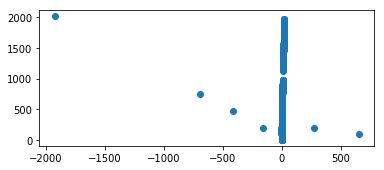

In [64]:
pred_val = lm.fittedvalues.copy()
true_val = data['Wallet_trx'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

**Autocorrelation**: The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.

**How to check**: Look for Durbin – Watson (DW) statistic. It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation. Also, you can see residual vs time plot and look for the seasonal or correlated pattern in residual values.

From the OLS Regression results, we can see the value of DW.

DW = 1.152 implies that Positive Autocorrelation exists.

**Multicollinearity**: This phenomenon exists when the independent variables are found to be moderately or highly correlated. In a model with correlated variables, it becomes a tough task to figure out the true relationship of a predictors with response variable. In other words, it becomes difficult to find out which variable is actually contributing to predict the response variable.

**How to check**: You can use scatter plot to visualize correlation effect among variables. Also, you can also use VIF factor. VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity. Above all, a correlation table should also solve the purpose.

In [65]:
print(X.corr())

                Qtr1_Bal  Qtr2_Bal  Qtr3_Bal  Qtr4_Bal  Perc_inc_q4_q1  \
Qtr1_Bal        1.000000  0.001456 -0.003548 -0.009190       -0.564647   
Qtr2_Bal        0.001456  1.000000  0.000491 -0.010554       -0.007553   
Qtr3_Bal       -0.003548  0.000491  1.000000  0.003883       -0.005122   
Qtr4_Bal       -0.009190 -0.010554  0.003883  1.000000        0.095494   
Perc_inc_q4_q1 -0.564647 -0.007553 -0.005122  0.095494        1.000000   
Female         -0.018313 -0.005667 -0.010212 -0.005432        0.022089   
Male            0.018313  0.005667  0.010212  0.005432       -0.022089   
North           0.000649  0.005970 -0.003608  0.017338        0.012810   
South          -0.005639 -0.008520 -0.005636 -0.016508        0.019535   
East           -0.005252  0.004875 -0.009713  0.003364       -0.004552   
West            0.007911 -0.000994  0.014670 -0.003057       -0.025808   

                  Female      Male     North     South      East      West  
Qtr1_Bal       -0.018313  0.018313

We can see that Female and Male are highly correlated.

This can be resolved by using either one from Male and Female variables.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)


    VIF Factor        features
0     1.472920        Qtr1_Bal
1     1.000299        Qtr2_Bal
2     1.000453        Qtr3_Bal
3     1.012848        Qtr4_Bal
4     1.487816  Perc_inc_q4_q1
5          inf          Female
6          inf            Male
7          inf           North
8          inf           South
9          inf            East
10         inf            West


C:\Users\ab275\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


**Heteroskedasticity**: The presence of non-constant variance in the error terms results in heteroskedasticity. Generally, non-constant variance arises in presence of outliers or extreme leverage values. Look like, these values get too much weight, thereby disproportionately influences the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.

**How to check**: You can look at residual vs fitted values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern (shown in next section). Also, you can use Breusch-Pagan / Cook – Weisberg test or White general test to detect this phenomenon.

<img src = "Images/hetero2.png" >

<img src = "Images/hetero3.png">

Text(0.5,0,'fitted values')

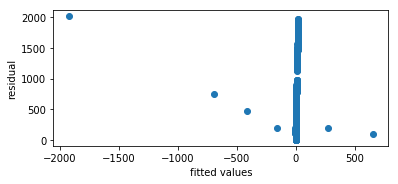

In [67]:
pred_val = lm.fittedvalues.copy()
true_val = data['Wallet_trx'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(residual, pred_val)
plt.ylabel('residual')
plt.xlabel('fitted values')

**Normal Distribution of error terms**: If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Presence of non – normal distribution suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to check**: You can look at QQ plot (shown below). You can also perform statistical tests of normality such as Kolmogorov-Smirnov test, Shapiro-Wilk test.

# QQ Plot
A Q-Q plot stands for a "quantile-quantile plot".

It is a plot where the axes are purposely transformed in order to make a normal (or Gaussian) distribution appear in a straight line. In other words, a perfectly normal distribution would exactly follow a line with slope = 1 and intercept = 0.

Therefore, if the plot does not appear to be - roughly - a straight line, then the underlying distribution is not normal. 

If it bends up, then there are more "high flyer" values than expected, for instance.

### What do the x & y labels represent?
The theoretical quantiles are placed along the x-axis. That is, the x-axis is not your data, it is simply an expectation of where your data should have been, if it were normal.

The actual data is plotted along the y-axis.

The values are the standard deviations from the mean. So, 0 is the mean of the data, 1 is 1 standard deviation above, etc. This means, for instance, that 68.27% of all your data should be between -1 & 1, if you have a normal distribution.

## Normally Distributed QQ-plot
<img src = "Images/qqplot1.png" > 

## Not Normally Distributed QQ-plot
<img src = "Images/qqplot2.png" >

Lets plot QQ-plot now using another important library SCIPY.

Text(0.5,1,'Model Residuals Probability Plot')

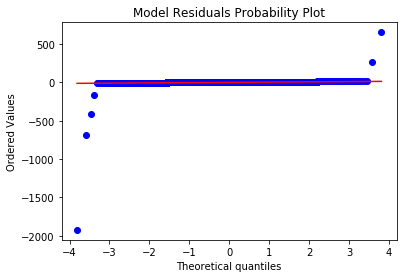

In [68]:
from scipy import stats
stats.probplot(lm.resid, plot= plt)
plt.title("Model Residuals Probability Plot")

This Model Residuals probability plot is a scatter plot which helps us validate the assumption of normal distribution in a data set. Using this plot we can infer if the data comes from a normal distribution. If yes, the plot would show fairly straight line. Absence of normality in the errors can be seen with deviation in the straight line.

Here the plot is a fairly straight line but have outliers at the end, thus normality is absent.

# Model Applications

After building the model and checking the assumptions, we need to use the model for new customers.

If we are given quarterly data for new customers, and we are asked to find which customers have a high propensity of becoming High CLTV customers and Low CLTV customers, we will make use of our linear regression model to do this. 

In [92]:
# Lets use below data as data for new customers : 
new_data = pd.DataFrame({'Qtr1_Bal':[4,7,10,38,44,52], 'Qtr2_Bal':[28,16,10,49,56,37], 
                         'Qtr3_Bal':[32,19,28,46,35,41],'Qtr4_Bal':[80,69,92,45,61,72],
                         'Perc_inc_q4_q1':[88,73,92,18,21,8],'Female':[0,1,1,0,0,0],'Male':[1,0,0,1,1,1],
                         'North':[1,0,0,0,0,0],'South':[0,0,1,0,1,0],'East':[0,0,0,0,0,0],'West':[0,1,0,1,0,1]})

In [93]:
print(new_data)

   Qtr1_Bal  Qtr2_Bal  Qtr3_Bal  Qtr4_Bal  Perc_inc_q4_q1  Female  Male  \
0         4        28        32        80              88       0     1   
1         7        16        19        69              73       1     0   
2        10        10        28        92              92       1     0   
3        38        49        46        45              18       0     1   
4        44        56        35        61              21       0     1   
5        52        37        41        72               8       0     1   

   North  South  East  West  
0      1      0     0     0  
1      0      0     0     1  
2      0      1     0     0  
3      0      0     0     1  
4      0      1     0     0  
5      0      0     0     1  


In [95]:
# Predict the output using the linear model 'lm' and predict function
print(lm.predict(new_data))

0    1833.550122
1    1524.718292
2    1918.701272
3     384.743339
4     446.188959
5     177.980024
dtype: float64


First 3 customers seem to have high Wallet_trx prediction values and hence will be high CLTV customers.

Similarly, last 3 customers will be low CLTV customers.